Feature names: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
Dataset shape: (20640, 8)
Mean Squared Error: 0.4324
R² Score: 0.6700


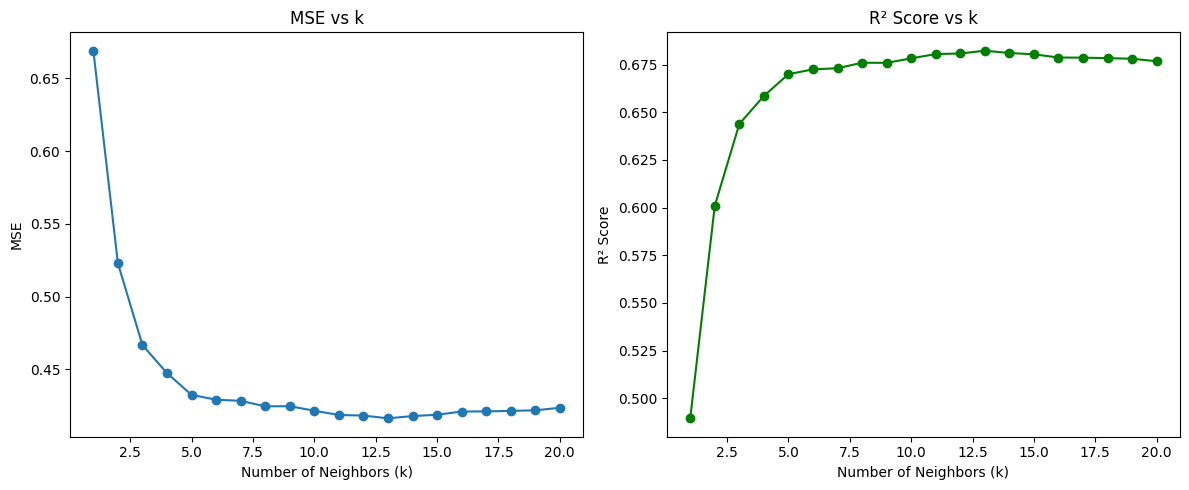

In [2]:
#Demostrate the KNN for Regression on Califoria_house_price
# KNN Regression on California Housing Dataset

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# 1. Load dataset
california = fetch_california_housing(as_frame=True)
X, y = california.data, california.target  # Features & target

print("Feature names:", california.feature_names)
print("Dataset shape:", X.shape)

# 2. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 3. Feature Scaling (important for KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. Train KNN Regressor with k=5
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# 5. Predictions
y_pred = knn.predict(X_test_scaled)

# 6. Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.4f}")
print(f"R² Score: {r2:.4f}")

# 7. Effect of different K values
errors = []
r2_scores = []
k_values = range(1, 21)

for k in k_values:
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(X_train_scaled, y_train)
    y_pred_k = model.predict(X_test_scaled)
    errors.append(mean_squared_error(y_test, y_pred_k))
    r2_scores.append(r2_score(y_test, y_pred_k))

# Plot performance
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(k_values, errors, marker='o')
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("MSE")
plt.title("MSE vs k")

plt.subplot(1,2,2)
plt.plot(k_values, r2_scores, marker='o', color='green')
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("R² Score")
plt.title("R² Score vs k")

plt.tight_layout()
plt.show()
